In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools

import numpy as np

/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
#if not os.path.exists('_cache'):
 #   os.mkdir('_cache')

#p21c.config['direc'] = '_cache'
#cache_tools.clear_cache(direc="_cache")

2023-11-23 08:59:06,652 | INFO | Removed 100 files from cache.


In [2]:
#p21c.AstroParams._defaults_

In [3]:
random_seed = 1605

HII_DIM = 64
BOX_LEN = 200 #cell size of ~3 Mpc or below for relative velocities

# USE_FFTW_WISDOM make FFT faster AND use relative velocities. , 'USE_INTERPOLATION_TABLES': True or code is too slow
user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True, 'USE_INTERPOLATION_TABLES': True,
               "FAST_FCOLL_TABLES": True,
               "USE_RELATIVE_VELOCITIES": True, "POWER_SPECTRUM": 5}

#set FAST_FCOLL_TABLES to TRUE if using minihaloes, it speeds up the generation of tables by ~x30 (see Appendix of 2110.13919)
#USE_RELATIVE_VELOCITIES is important for minihaloes. If True, POWER_SPECTRUM has to be set to 5 (CLASS) to get the transfers.



initial_conditions = p21c.initial_conditions(user_params=user_params,
                                             random_seed=random_seed,
                                             #, regenerate=True
                                            )



/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_uti

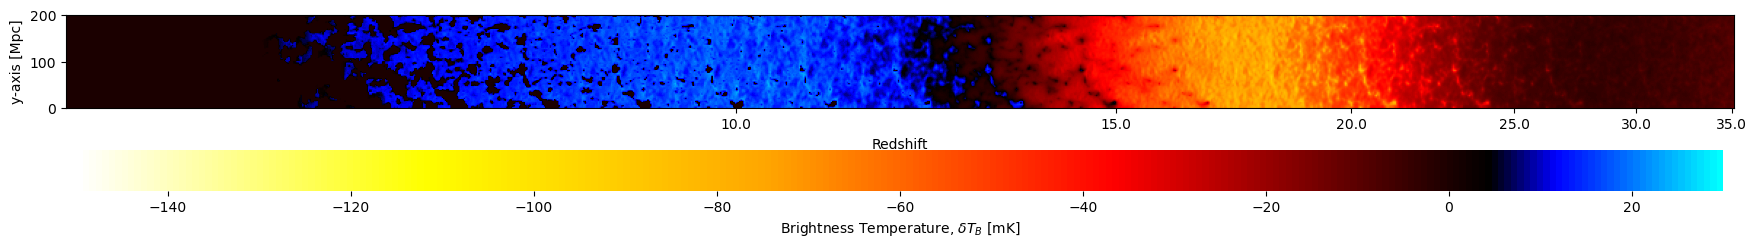

In [5]:
lightcone_quantities = ('brightness_temp',"density")

astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.75,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}

flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS':True}


lightcone_fid = p21c.run_lightcone(
        redshift = 5.5,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_fid,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc='_cache'
)


plotting.lightcone_sliceplot(lightcone_fid);
plt.tight_layout()
plt.savefig('original')

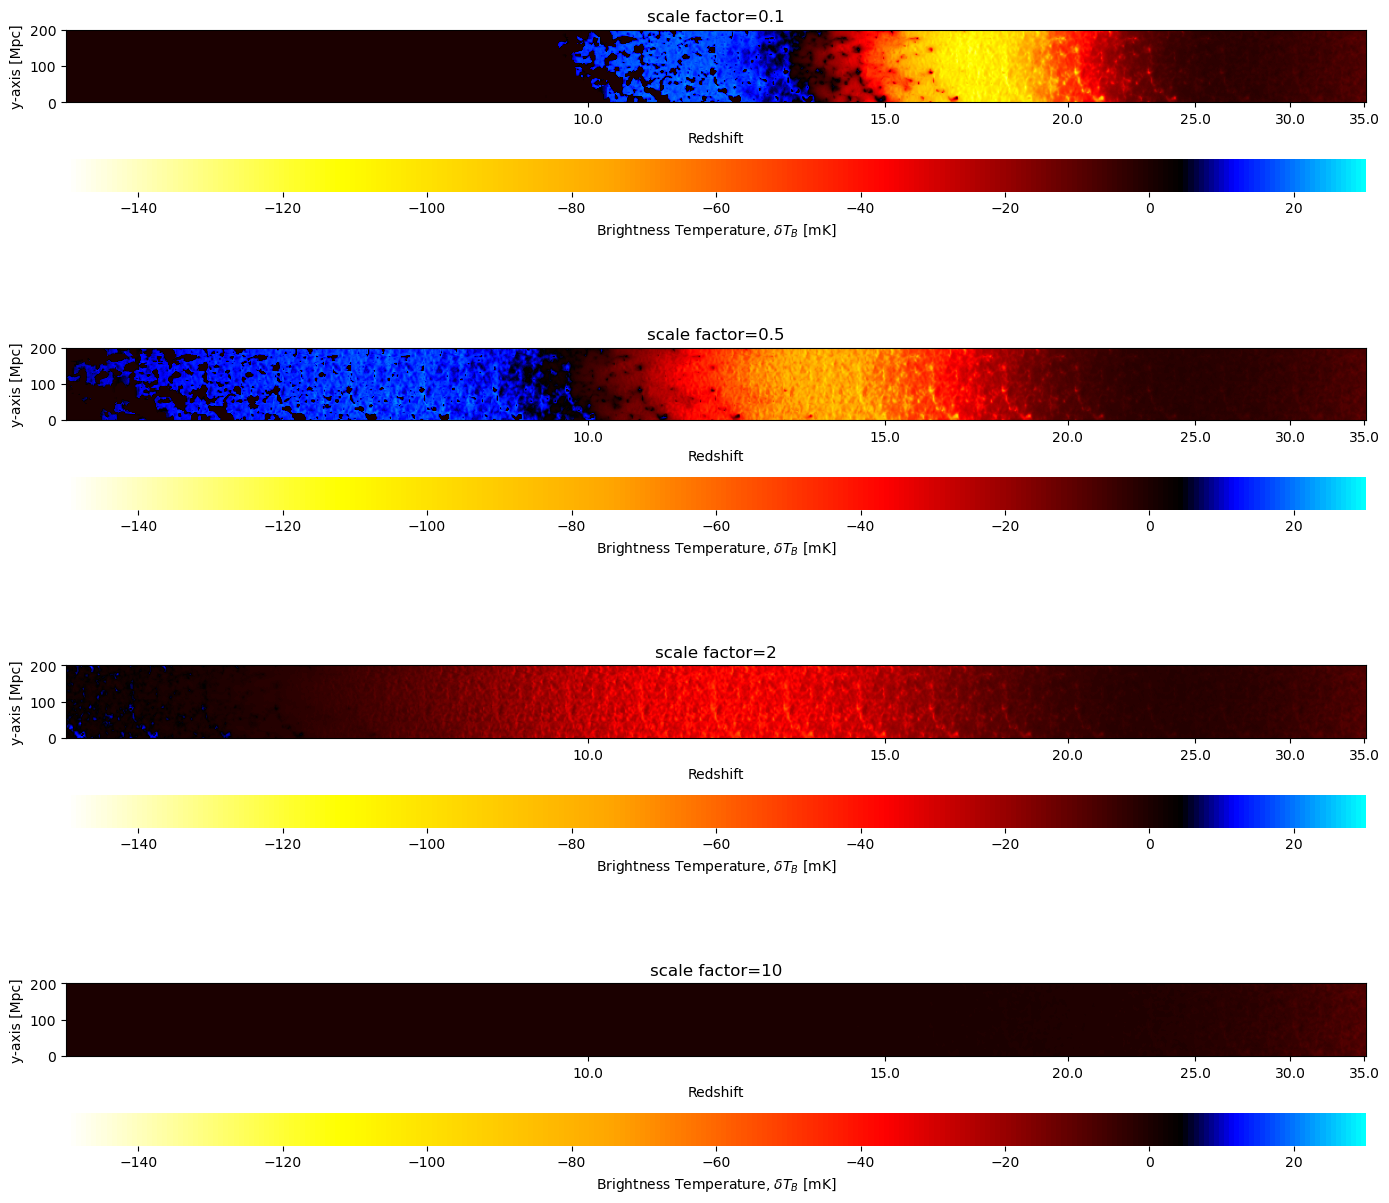

In [10]:
vl = -3.00
f_s = [0.1*vl,0.5*vl,2*vl,10*vl]

fig, ax = plt.subplots(4,1, figsize=(14,14))

bnm =[0.1, 0.5, 2, 10]

for i in range(4):
    F_star10 = f_s[i]

    # set necessary flags for using minihalos and astro parameter
    astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': F_star10, 'F_STAR7_MINI': -3.00,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}


    lightcone_fid = p21c.run_lightcone(
            redshift = 5.5,
            init_box = initial_conditions,
            flag_options = flag_options_fid,
            astro_params = astro_params_fid,
            lightcone_quantities=lightcone_quantities,
            global_quantities=lightcone_quantities,
            random_seed = random_seed,
            direc='_cache'
    )

    plotting.lightcone_sliceplot(lightcone_fid, ax=ax[i], fig=fig);
    plt.title('scale factor='+str(bnm[i]))
    plt.tight_layout()
  

plt.savefig('changing_F_star10')

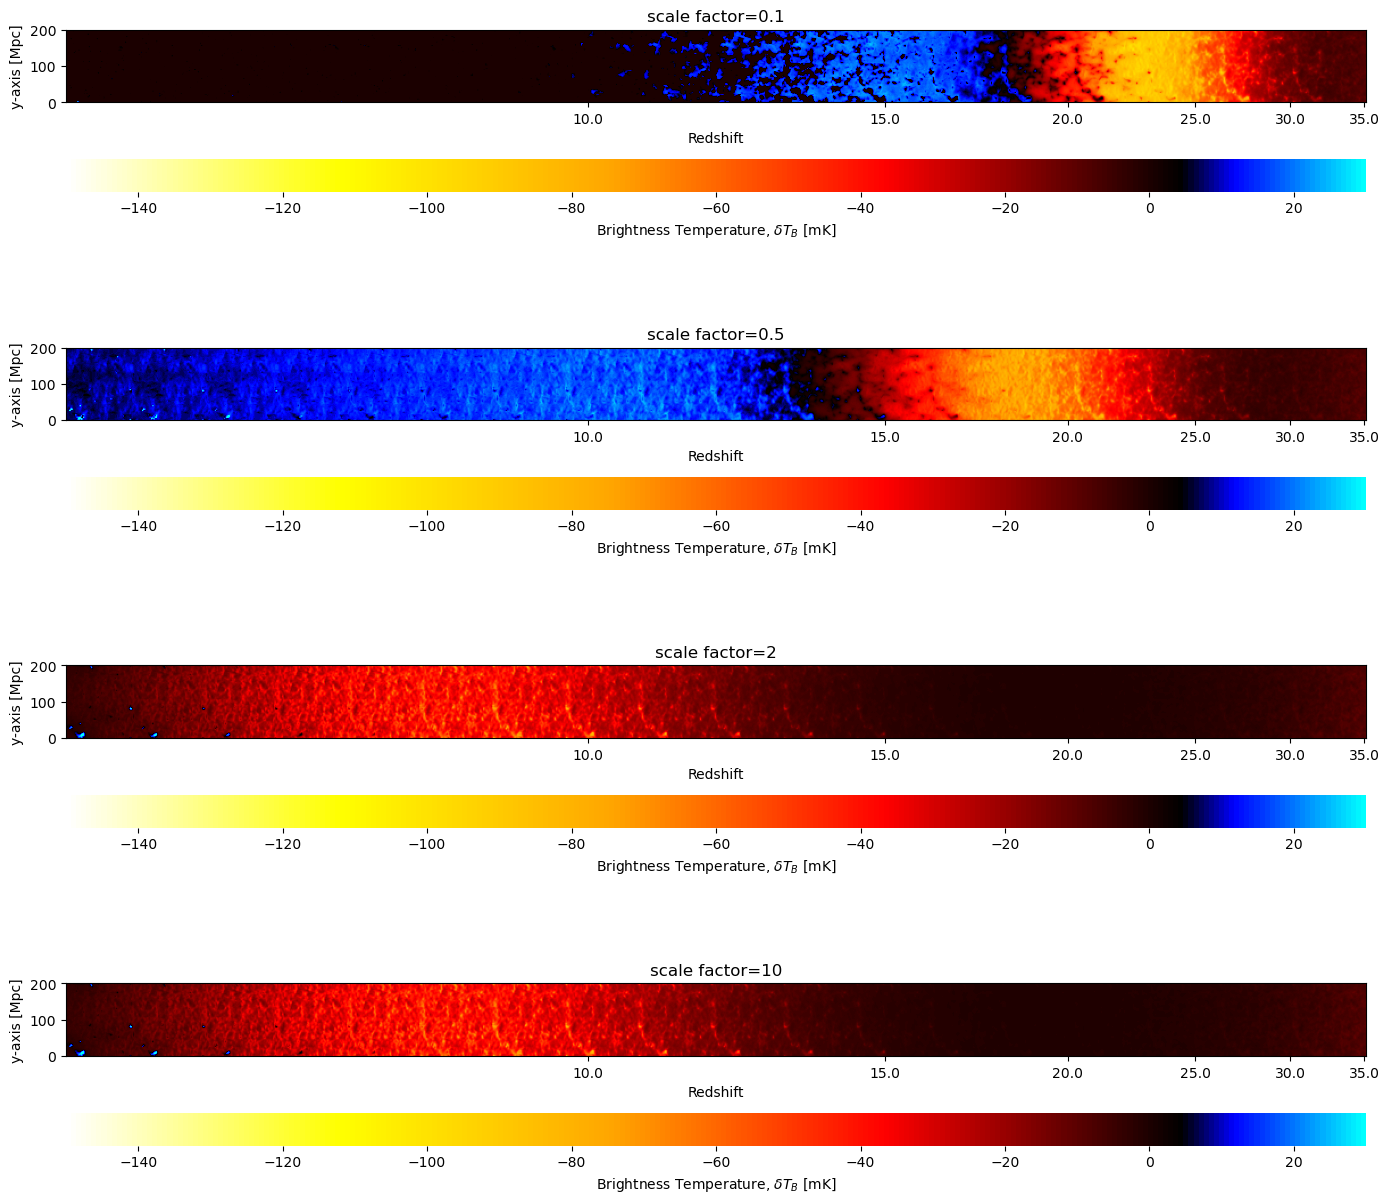

In [12]:
vl = -3.00
f_s = [0.1*vl,0.5*vl,2*vl,10*vl]

fig, ax = plt.subplots(4,1, figsize=(14,14))

bnm =[0.1, 0.5, 2, 10]


for i in range(4):
    F_star7mini = f_s[i]

    # set necessary flags for using minihalos and astro parameter
    astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -3.00, 'F_STAR7_MINI': F_star7mini,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}


    lightcone_fid = p21c.run_lightcone(
            redshift = 5.5,
            init_box = initial_conditions,
            flag_options = flag_options_fid,
            astro_params = astro_params_fid,
            lightcone_quantities=lightcone_quantities,
            global_quantities=lightcone_quantities,
            random_seed = random_seed,
            direc='_cache'
    )

    plotting.lightcone_sliceplot(lightcone_fid, ax=ax[i], fig=fig);
    plt.title('scale factor='+str(bnm[i]))
    plt.tight_layout()
  
    
plt.savefig('changing_F_star7mini')

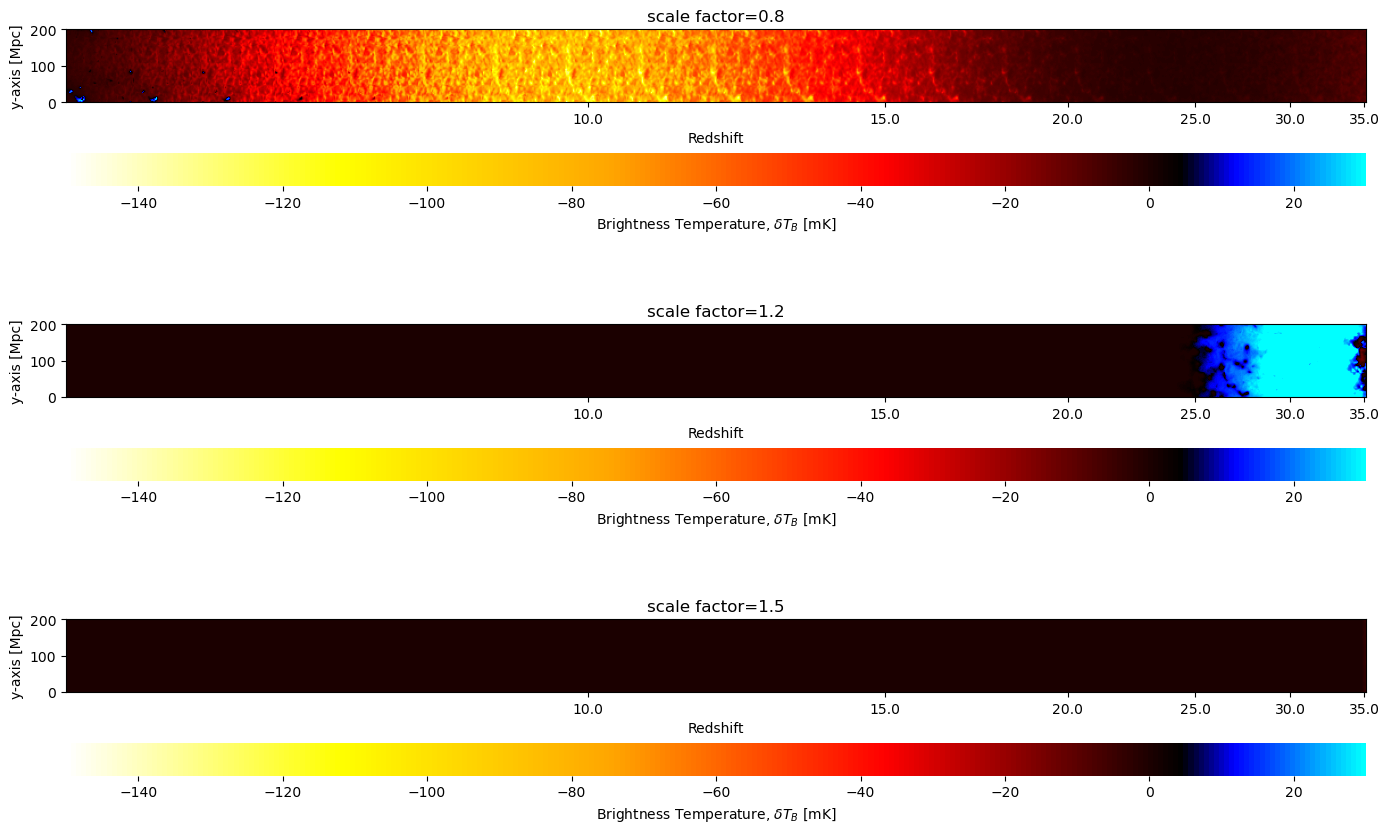

In [6]:
vl = 40.5
f_s = [0.8*vl,1.2*vl,1.5*vl]

fig, ax = plt.subplots(3,1, figsize=(14,10))

bnm =[0.8, 1.2, 1.5]

for i in range(3):
    lxmini = f_s[i]

    # set necessary flags for using minihalos and astro parameter
    astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -3.00, 'F_STAR7_MINI': -3.00,
                    'L_X': 40.5, 'L_X_MINI': lxmini, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}


    lightcone_fid = p21c.run_lightcone(
            redshift = 5.5,
            init_box = initial_conditions,
            flag_options = flag_options_fid,
            astro_params = astro_params_fid,
            lightcone_quantities=lightcone_quantities,
            global_quantities=lightcone_quantities,
            random_seed = random_seed,
            direc='_cache'
    )


    plotting.lightcone_sliceplot(lightcone_fid, ax=ax[i], fig=fig);
    plt.title('scale factor='+str(bnm[i]))
    plt.tight_layout()
  
plt.savefig('changing_L_Xmini')

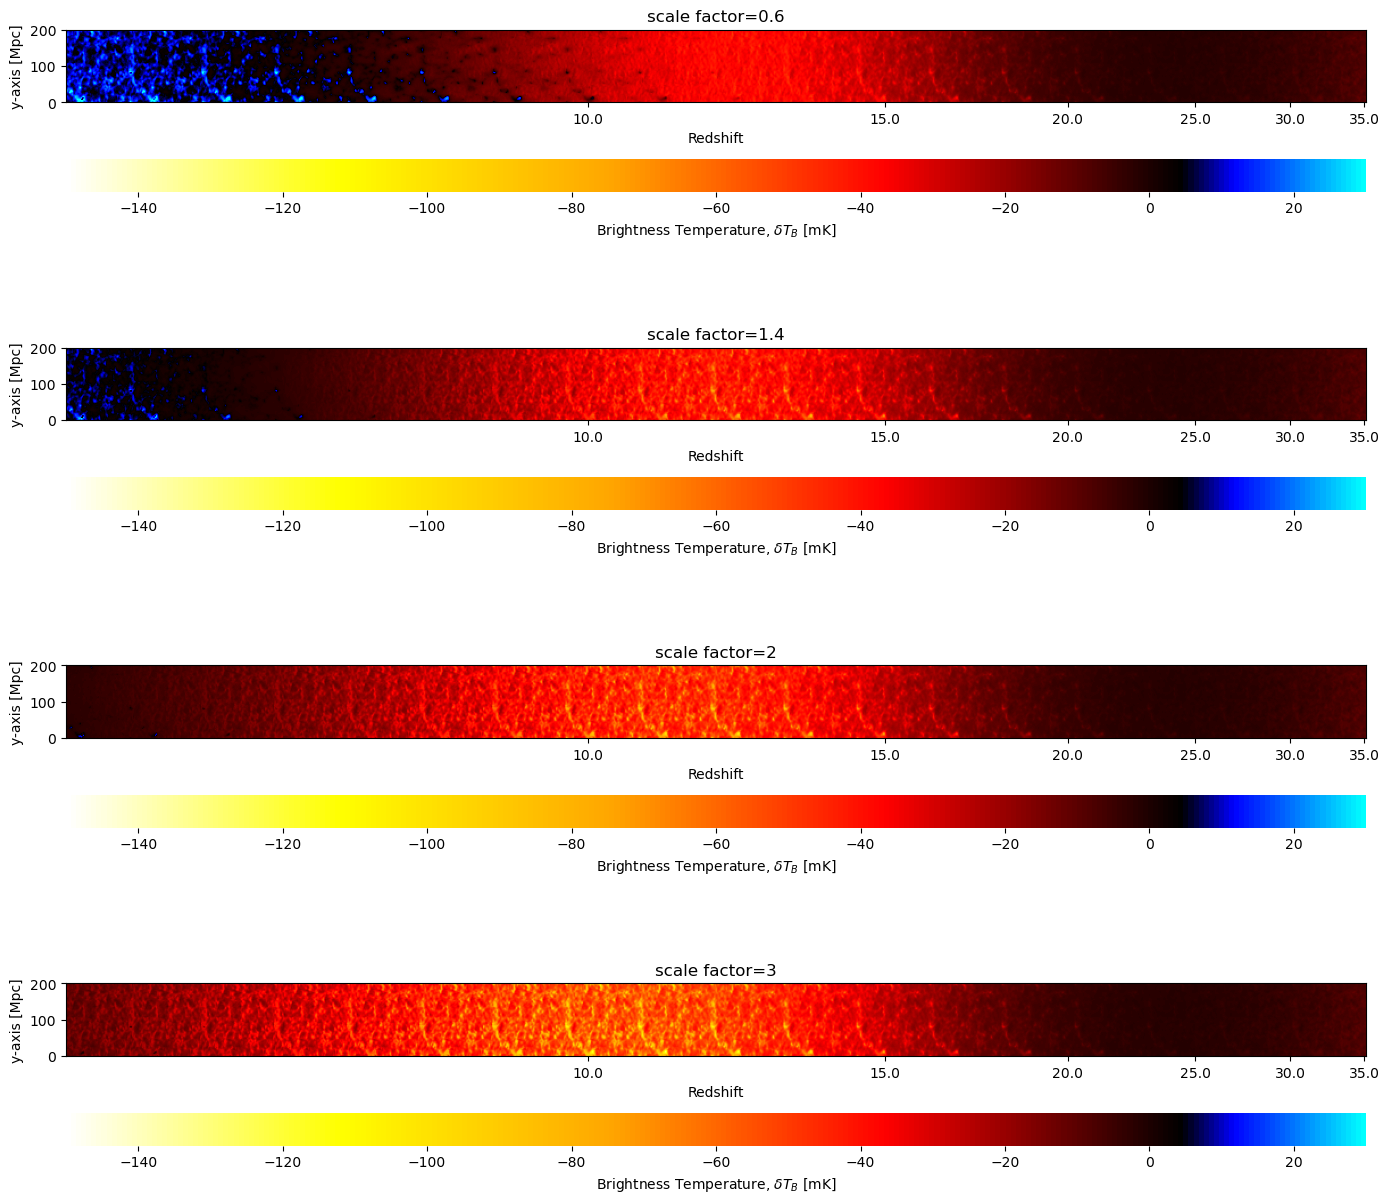

In [8]:
# between 100 to 2000
vl = 500
f_s = [0.6*vl,1.4*vl,2*vl,3*vl]

fig, ax = plt.subplots(4,1, figsize=(14,14))

bnm =[0.6, 1.4, 2, 3]

for i in range(4):
    nux = f_s[i]

    # set necessary flags for using minihalos and astro parameter
    astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -3.00, 'F_STAR7_MINI': -3.00,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': nux, 'F_H2_SHIELD': 0.0}


    lightcone_fid = p21c.run_lightcone(
            redshift = 5.5,
            init_box = initial_conditions,
            flag_options = flag_options_fid,
            astro_params = astro_params_fid,
            lightcone_quantities=lightcone_quantities,
            global_quantities=lightcone_quantities,
            random_seed = random_seed,
            direc='_cache'
    )

    plotting.lightcone_sliceplot(lightcone_fid, ax=ax[i], fig=fig);
    plt.title('scale factor='+str(bnm[i]))
    plt.tight_layout()
  
    
plt.savefig('change_NU_X_THRESH')